In [51]:
from pandas import Series
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from dateutil.parser import parse

In [52]:
series = pd.read_csv('switch.dat')
series.head()

,DATE_TIME,Series1,Series2
0,18th Jan 00:00,1,1
1,18th Jan 00:01,1,1
2,18th Jan 00:02,1,0
3,18th Jan 00:03,0,0
4,18th Jan 00:04,0,0


In [53]:
date1 =   [''.join(list(series['DATE_TIME'].iloc[e])) for e in range(len(series)) ]
date1
date2 = [parse(date1[i]) for i in range(len(series))]
date1[0]
dt = parse('18th Jan 00:01')
dt

datetime.datetime(2019, 1, 18, 0, 1)

Text(0.5,1,'Switch1')

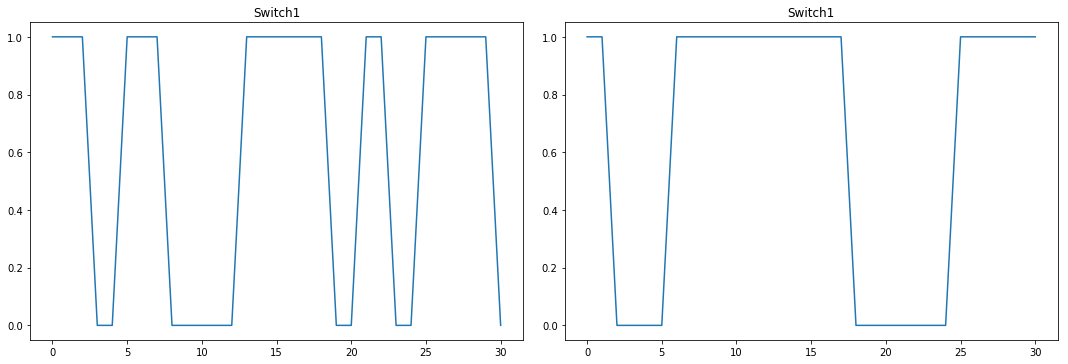

In [56]:
f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
f1.tight_layout()
series['Series1'].plot(subplots=True, ax=ax1, legend=False, sharex=False, sharey=False)
ax1.set_title('Switch1')
series['Series2'].plot(subplots=True, ax=ax2, legend=False, sharex=False, sharey=False)
ax2.set_title('Switch1')

Sample size
<br>
In this class, we will primarily focus on Type I error.  But, you should be aware that Type II error is also important.  A small sample size, for example, might lead to frequent Type II errors, i.e. it could be that your (alternative) hypotheses are right, but because your sample is so small, you fail to reject the null even though you should.

Central Limit Theorem (CLT) is used. If sample size > 30 then it is sufficient for CLT. Samples are independent because they are taken from different people.

In [65]:
from statsmodels.tsa.stattools import adfuller
P_result1 = adfuller(series.Series1)
P_result2 = adfuller(series.Series2)

In [66]:
print('Switch1:\nADF Statistic: %f' % P_result1[0])
print('p-value: %f' % P_result1[1])
for key, value in P_result1[4].items():
    print('\t%s: %.3f' % (key, value))

Switch1:
ADF Statistic: -3.182176
p-value: 0.021040
	1%: -3.711
	5%: -2.981
	10%: -2.630


In [67]:
print('Switch1:\nADF Statistic: %f' % P_result2[0])
print('p-value: %f' % P_result2[1])
for key, value in P_result2[4].items():
    print('\t%s: %.3f' % (key, value))

Switch1:
ADF Statistic: -2.166273
p-value: 0.218713
	1%: -3.670
	5%: -2.964
	10%: -2.621


Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
<br>
 Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
<br>
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
<br>
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
<br>
**Series1**
<br>
Running the example shows a negative value for the test statistic.

We can see that the value is smaller than the critical values, meaning that the null hypothesis is rejected and the time series is stationary.

**Series2**
<br>
Running the example shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

There is correlation between stationary and non-stationary time series.
<br>
When your data is nonstationary (inhomogeneous), autocorrelation can still be defined and computed, but will now depend on the pivot (=reference) point as well, nut just the distance (=delay, lag) between points. As a result, the autocorrelation becomes a functional, no longer a function. In the discretized (sampled) case, this functional becomes a matrix. For one example of what the autocorrelation matrix can look like, see e.g. Fig. 2 in my paper 'Optimizing Low-Frequency Mode Stirring Performance Using Principal Component Analysis'.

https://stats.stackexchange.com/questions/68425/how-to-determine-correlation-between-stationary-and-non-stationary-time-series
https://machinelearningmastery.com/time-series-data-stationary-python/

In [68]:
#cross-correlation between signals